In [1]:
!pip install diffprivlib

     |████████████████████████████████| 76 kB 2.1 MB/s eta 0:00:01
  Created wheel for diffprivlib: filename=diffprivlib-0.4.1-py3-none-any.whl size=153525 sha256=af49fd277e81a8353c204c8812d0630c3106b242982800a7718063235405160f
  Stored in directory: /Users/zarreennaowalreza/Library/Caches/pip/wheels/bf/79/d6/dd735f95e666baf4bcee18751b49faff6c280bf80deb02026c
Successfully built diffprivlib
You should consider upgrading via the '/Users/zarreennaowalreza/Desktop/openmined/duet/duet_env/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
train_data = pd.read_csv('/Users/zarreennaowalreza/Desktop/openmined/PPMH/schrizofrenia_tab_data/final_train_50.csv')
print(train_data.shape)
train_data.head()

(69, 51)


,FNC40,FNC33,FNC20,SBM_map67,SBM_map61,SBM_map36,SBM_map17,FNC48,FNC37,FNC353,...,FNC289,FNC285,FNC278,FNC275,FNC23,FNC213,FNC211,FNC210,FNC177,Class
0,-0.042770,0.21967,0.023462,-0.553621,-0.048894,-0.666222,0.393087,-0.16328,-0.068833,-0.020897,...,0.003765,-0.25555,-0.22028,0.091184,-0.189860,0.094641,0.45274,0.350390,-0.012638,1
1,0.026720,0.82281,-0.146650,-0.300549,-0.030364,-0.336090,0.964257,0.71657,0.447540,-0.227980,...,0.469910,-0.36558,-0.49325,0.013791,0.561350,0.083160,0.48699,0.723200,-0.000896,0
2,-0.081407,0.44264,0.012487,-0.081175,1.332840,1.172378,-1.050905,0.60398,-0.169190,-0.252030,...,0.020654,-0.15788,0.39020,0.213510,-0.090663,0.326170,-0.18757,0.390630,-0.111880,1
3,-0.365520,0.21516,0.195540,0.220316,-0.982331,-1.062109,0.137624,0.22927,-0.086613,-0.230490,...,0.465930,-0.11343,-0.18818,-0.023861,0.338460,0.407870,0.28285,0.231020,0.126880,1
4,-0.054571,0.47644,0.506320,-0.370420,0.313340,0.212350,1.952477,-0.33573,0.198670,-0.266090,...,0.362940,-0.44335,0.13523,0.221310,-0.044503,0.021357,0.37870,0.004384,0.079035,1


In [3]:
test_data = pd.read_csv('/Users/zarreennaowalreza/Desktop/openmined/PPMH/schrizofrenia_tab_data/final_test_50.csv')
print(test_data.shape)
test_data.head()

(17, 51)


,FNC40,FNC33,FNC20,SBM_map67,SBM_map61,SBM_map36,SBM_map17,FNC48,FNC37,FNC353,...,FNC289,FNC285,FNC278,FNC275,FNC23,FNC213,FNC211,FNC210,FNC177,Class
0,0.34404,0.64302,0.148900,-0.791032,0.829697,-0.026555,0.187573,0.515280,0.485810,0.273290,...,0.116160,0.11131,-0.14180,0.43596,0.40514,0.49545,0.62594,0.488840,0.15221,0
1,-0.12732,0.25707,0.373060,0.889753,-0.978412,-1.027496,1.961955,0.176950,-0.105510,-0.499290,...,0.110400,0.24471,0.16378,0.14387,-0.34615,0.43485,0.21171,-0.177450,0.19885,1
2,0.34123,0.66877,0.338740,0.785572,-0.896406,-0.213169,0.313224,0.253410,0.098053,-0.316810,...,-0.085182,-0.16643,0.26968,0.57360,-0.25904,0.61563,0.55868,0.447560,-0.36652,1
3,0.24601,0.59077,-0.067104,-1.522856,1.739382,1.574719,-1.308689,-0.033231,-0.304670,0.500520,...,0.078982,-0.51740,-0.57098,0.46945,0.19352,-0.22173,-0.10941,0.336160,-0.13141,0
4,-0.17317,0.51587,0.277670,-0.256770,0.263038,0.833339,-0.051214,0.679640,0.499420,0.083208,...,0.194680,0.21828,0.27271,0.37475,0.69264,0.36131,0.14574,0.027857,-0.11404,0


In [4]:
import diffprivlib.models as dp
from sklearn.linear_model import LogisticRegression

In [5]:
X_train = train_data.loc[:, train_data.columns != 'Class']
y_train = train_data['Class']

X_test = test_data.loc[:, test_data.columns != 'Class']
y_test = test_data['Class']

In [6]:
dp_clf = dp.LogisticRegression(data_norm=5.6778)

dp_clf.fit(X_train, y_train)

LogisticRegression(accountant=BudgetAccountant(spent_budget=[(1.0, 0)]),
                   data_norm=5.6778)

In [7]:
print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" % 
     (dp_clf.epsilon, dp_clf.score(X_test, y_test) * 100))

Differentially private test accuracy (epsilon=1.00): 58.82%


By setting epsilon = float("inf"), we can produce the same result as the non-private logistic regression classifer.

In [8]:
dp_clf_inf = dp.LogisticRegression(epsilon=float("inf"), data_norm=5.6778)
dp_clf_inf.fit(X_train, y_train)

LogisticRegression(accountant=BudgetAccountant(spent_budget=[(1.0, 0), (inf, 0)]),
                   data_norm=5.6778, epsilon=inf)

In [11]:
print("Non-private test accuracy (epsilon=%.2f): %.2f%%" % 
     (dp_clf_inf.epsilon, dp_clf_inf.score(X_test, y_test) * 100))

Non-private test accuracy (epsilon=inf): 88.24%


In [12]:
clf = LogisticRegression(solver="lbfgs")
clf.fit(X_train, y_train)

LogisticRegression()

In [13]:
baseline = clf.score(X_test, y_test)
print("Non-private test accuracy: %.2f%%" % (baseline * 100))

Non-private test accuracy: 88.24%


In [14]:
print("Agreement between non-private and differentially private (epsilon=inf) classifiers: %.2f%%" % 
     (dp_clf.score(X_test, clf.predict(X_test)) * 100))

Agreement between non-private and differentially private (epsilon=inf) classifiers: 58.82%


In [15]:
y_pred = dp_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Overall test accuracy", acc*100)

Overall test accuracy 58.82352941176471


In [16]:
for i in range(len(y_test)):
    print(f"Prediction: {y_pred[i]} Ground Truth: {y_test[i]}")

Prediction: 0 Ground Truth: 0
Prediction: 0 Ground Truth: 1
Prediction: 1 Ground Truth: 1
Prediction: 1 Ground Truth: 0
Prediction: 0 Ground Truth: 0
Prediction: 0 Ground Truth: 0
Prediction: 0 Ground Truth: 0
Prediction: 1 Ground Truth: 1
Prediction: 0 Ground Truth: 1
Prediction: 1 Ground Truth: 0
Prediction: 0 Ground Truth: 1
Prediction: 0 Ground Truth: 1
Prediction: 0 Ground Truth: 1
Prediction: 0 Ground Truth: 0
Prediction: 0 Ground Truth: 0
Prediction: 0 Ground Truth: 0
Prediction: 0 Ground Truth: 0


In [20]:
epsilons = np.logspace(-2, 2, 50)
accuracy = list()
acc_ep = {}

for epsilon in epsilons:
    dp_clf = dp.LogisticRegression(epsilon=epsilon, data_norm=5.6778)
    dp_clf.fit(X_train, y_train)
    score = dp_clf.score(X_test, y_test)
    accuracy.append(score)
    acc_ep[epsilon] = score

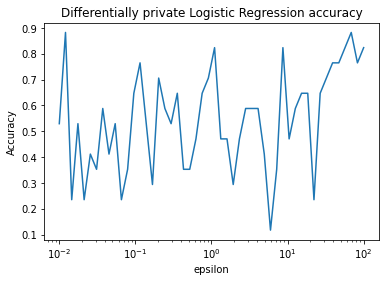

In [21]:
plt.semilogx(epsilons, accuracy)
plt.title("Differentially private Logistic Regression accuracy")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.show()

In [22]:
acc_ep

{0.01: 0.5294117647058824,
 0.012067926406393288: 0.8823529411764706,
 0.014563484775012436: 0.23529411764705882,
 0.017575106248547922: 0.5294117647058824,
 0.021209508879201904: 0.23529411764705882,
 0.025595479226995357: 0.4117647058823529,
 0.030888435964774818: 0.35294117647058826,
 0.0372759372031494: 0.5882352941176471,
 0.04498432668969444: 0.4117647058823529,
 0.054286754393238594: 0.5294117647058824,
 0.0655128556859551: 0.23529411764705882,
 0.07906043210907697: 0.35294117647058826,
 0.09540954763499938: 0.6470588235294118,
 0.1151395399326447: 0.7647058823529411,
 0.13894954943731375: 0.5294117647058824,
 0.16768329368110074: 0.29411764705882354,
 0.20235896477251566: 0.7058823529411765,
 0.2442053094548651: 0.5882352941176471,
 0.29470517025518095: 0.5294117647058824,
 0.35564803062231287: 0.6470588235294118,
 0.42919342601287763: 0.35294117647058826,
 0.517947467923121: 0.35294117647058826,
 0.6250551925273969: 0.47058823529411764,
 0.7543120063354615: 0.6470588235294118,

In [38]:
epsilon = 0.012067926406393288

dp_clf = dp.LogisticRegression(epsilon=epsilon, data_norm=5.6778)
dp_clf.fit(X_train, y_train)

print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" % 
     (dp_clf.epsilon, dp_clf.score(X_test, y_test) * 100))


Differentially private test accuracy (epsilon=0.01): 88.24%


In [49]:
epsilon = 1.0

dp_clf = dp.LogisticRegression(epsilon=epsilon, data_norm=5.6778)
dp_clf.fit(X_train, y_train)

print("Differentially private test accuracy (epsilon=%.2f): %.2f%%" % 
     (dp_clf.epsilon, dp_clf.score(X_test, y_test) * 100))

Differentially private test accuracy (epsilon=1.00): 94.12%


In [50]:
!pip show torch

Name: torch
Version: 1.7.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /Users/zarreennaowalreza/Desktop/openmined/duet/duet_env/lib/python3.8/site-packages
Requires: numpy, typing-extensions
Required-by: torchvision, syft


In [51]:
!pip install opendp-smartnoise

     |████████████████████████████████| 193 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 9.5 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 12.7 MB 9.6 MB/s eta 0:00:01    |█▋                              | 645 kB 9.6 MB/s eta 0:00:02
     |████████████████████████████████| 112 kB 17.8 MB/s eta 0:00:01
     |████████████████████████████████| 85 kB 13.2 MB/s eta 0:00:01
     |████████████████████████████████| 45 kB 6.8 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 21.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 23.5 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 9.9 MB/s  eta 0:00:01
  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=70e8ae2699bc6d61b4bb52588a9bb60afbf540cce0e8a3bdd8649be1be26ee3b
  Stored in directory: /Users/zarreennaowalreza/Library/Caches/pip/wheels/c8/d0/